In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
from sklearn.metrics import confusion_matrix

In [ ]:
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

In [ ]:
train_data[0], train_labels[0]

In [ ]:
 class_names = ["T-shirt/top", "Trousers", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [ ]:
plt.figure(figsize=(6,6))
for i in range(4):
  ax = plt.subplot(2,2,i+1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)

In [ ]:
train_data.min(), train_data.max()

(0, 255)

In [ ]:
# Normalizing
train_data_norm = train_data/255.0
test_data_norm = test_data/255.0

train_data_norm.min(), train_data_norm.max()

(0.0, 1.0)

>**Model 1**  with Non-Normalized Data

In [ ]:
tf.random.set_seed(42)

model= tf.keras.Sequential([
    tf.keras.Input(shape=(28,28)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                   optimizer=tf.keras.optimizers.Adam(),
                   metrics="accuracy")

In [ ]:
hist = model.fit(train_data,
                 train_labels,
                 epochs=20,
                 validation_data=(test_data, test_labels)) # Using test data as validation data

Epoch 1/20
1875/1875 [==============================] - 3s 1ms/step - loss: 2.1643 - accuracy: 0.1609 - val_loss: 1.8304 - val_accuracy: 0.2048
Epoch 2/20
1875/1875 [==============================] - 2s 1ms/step - loss: 1.7084 - accuracy: 0.2484 - val_loss: 1.6614 - val_accuracy: 0.2850
Epoch 3/20
1875/1875 [==============================] - 2s 1ms/step - loss: 1.6351 - accuracy: 0.2837 - val_loss: 1.6084 - val_accuracy: 0.2756
Epoch 4/20
1875/1875 [==============================] - 2s 1ms/step - loss: 1.6108 - accuracy: 0.2912 - val_loss: 1.6029 - val_accuracy: 0.3046
Epoch 5/20
1875/1875 [==============================] - 2s 1ms/step - loss: 1.6025 - accuracy: 0.2993 - val_loss: 1.5837 - val_accuracy: 0.3139
Epoch 6/20
1875/1875 [==============================] - 2s 1ms/step - loss: 1.5838 - accuracy: 0.3120 - val_loss: 1.5673 - val_accuracy: 0.3281
Epoch 7/20
1875/1875 [==============================] - 2s 1ms/step - loss: 1.5788 - accuracy: 0.3183 - val_loss: 1.5687 - val_accuracy:

Text(0.5, 1.0, 'model loss curves')

<Figure size 864x864 with 0 Axes>

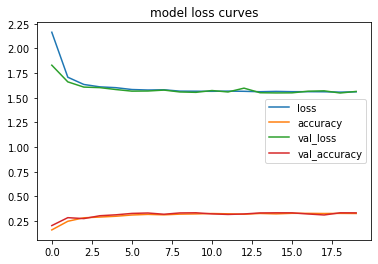

In [ ]:
plt.figure(figsize=(12,12))
pd.DataFrame(hist.history).plot()
plt.title("model loss curves")

>**Model 2** with Normalized Data

In [ ]:
tf.random.set_seed(42)

norm_model = tf.keras.Sequential([
     tf.keras.Input(shape=(28,28)),
     tf.keras.layers.Flatten(),
     tf.keras.layers.Dense(4, activation="relu"),
     tf.keras.layers.Dense(4, activation="relu"),
     tf.keras.layers.Dense(10, activation="softmax")
])

norm_model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                   optimizer=tf.keras.optimizers.Adam(),
                   metrics="accuracy")

In [ ]:
norm_hist = norm_model.fit(train_data_norm,
                           train_labels,
                           epochs = 20,
                           validation_data = (test_data_norm, test_labels)) # Using test data in validaton

Text(0.5, 1.0, 'norm_model loss curves')

<Figure size 864x864 with 0 Axes>

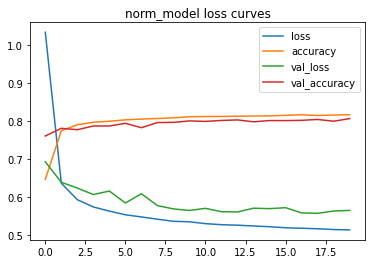

In [ ]:
plt.figure(figsize=(12,12))
pd.DataFrame(norm_hist.history).plot()
plt.title("norm_model loss curves")

>**Model 3** with Learning Rate callback (To find ideal Learning Rate)

In [ ]:
tf.random.set_seed(42)

model_t= tf.keras.Sequential([
    tf.keras.Input(shape=(28,28)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20)) # 1e-4 = 0.001

model_t.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics="accuracy")

In [ ]:
lr_hist = model_t.fit(train_data_norm,
                      train_labels,
                      epochs=40,
                      validation_data=(test_data_norm, test_labels),
                      callbacks=[lr_scheduler])

Text(0, 0.5, 'Loss')

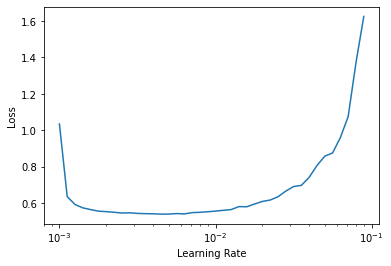

In [ ]:
lrs = 1e-3 *(10**(tf.range(40)/20)) # 1e-4 = 0.001
plt.semilogx(lrs, lr_hist.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")

In [ ]:
1e-3

>**Final Model**

In [ ]:
tf.random.set_seed(42)

model_f = tf.keras.Sequential([
    tf.keras.Input(shape=(28,28)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])
model_f.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate= 0.001),
                metrics="accuracy")

In [ ]:
f_hist = model_f.fit(train_data_norm,
                     train_labels,
                     epochs=20,
                     validation_data=(test_data_norm, test_labels))

Epoch 1/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4923 - accuracy: 0.8260 - val_loss: 0.4111 - val_accuracy: 0.8483
Epoch 2/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3634 - accuracy: 0.8675 - val_loss: 0.4152 - val_accuracy: 0.8528
Epoch 3/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3288 - accuracy: 0.8781 - val_loss: 0.3900 - val_accuracy: 0.8568
Epoch 4/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3067 - accuracy: 0.8867 - val_loss: 0.3805 - val_accuracy: 0.8624
Epoch 5/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2907 - accuracy: 0.8918 - val_loss: 0.3569 - val_accuracy: 0.8714
Epoch 6/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2776 - accuracy: 0.8953 - val_loss: 0.3789 - val_accuracy: 0.8637
Epoch 7/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2639 - accuracy: 0.9016 - val_loss: 0.3557 - val_accuracy:

>**Final Model** evaluation

In [ ]:
# Confusion Matrix

def plot_confusion_matrix(y_true, y_preds, classes=None, figsize=(10, 10), text_size=15):
  import itertools as iter
  c_matrix = confusion_matrix(y_true, y_preds)
  c_matrix_norm = c_matrix.astype("float") / c_matrix.sum(axis=1)[:, np.newaxis] # to normalize confuion matrix
  n_classes= c_matrix.shape[0]

  fig, ax = plt.subplots(figsize=figsize)
  
  # Matrix plot
  c_ax = ax.matshow(c_matrix, cmap=plt.cm.Blues) # matshow() displays an array as a matrix in a new figure window.
  fig.colorbar(c_ax)

  if classes:
    labels = classes
  else:
    labels = np.arange(c_matrix.shape[0])
  
  # Labeling
  ax.set(title="Confusion Matrix",
         xlabel="Predicted Label",
         ylabel="True Label",
         xticks=np.arange(n_classes),
         yticks=np.arange(n_classes),
         xticklabels=labels,
         yticklabels=labels)
  
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  ax.yaxis.label.set_size(text_size)
  ax.xaxis.label.set_size(text_size)
  ax.title.set_size(text_size)
  
  color_threshold = (c_matrix.max() + c_matrix.min())/2.

  # Ploting text on each cell
  for i, j in iter.product(range(c_matrix.shape[0]), range(c_matrix.shape[1])):
    plt.text(j, i, f"{c_matrix[i, j]} ({c_matrix_norm[i, j]*100:.1f}%)",
             horizontalalignment="center",
             color="white" if c_matrix[i, j] > color_threshold else "black",
             size=text_size) 



In [ ]:
probs = model_f(test_data_norm)
probs[:10]

<tf.Tensor: shape=(10, 10), dtype=float32, numpy=
array([[5.12291399e-06, 1.59231318e-14, 2.27564119e-08, 1.65046555e-14,
        7.25351557e-10, 4.72644888e-06, 7.90515031e-08, 1.38121622e-03,
        1.82002226e-11, 9.98608887e-01],
       [1.33057911e-04, 9.23926598e-17, 9.91418123e-01, 1.24638383e-10,
        8.13469943e-03, 3.08941440e-15, 3.14163452e-04, 7.42104349e-13,
        9.10414036e-11, 2.61985780e-11],
       [3.79713893e-22, 1.00000000e+00, 1.33378582e-22, 2.52376087e-16,
        1.56174818e-20, 0.00000000e+00, 1.31975515e-16, 0.00000000e+00,
        2.19213222e-21, 4.02783845e-31],
       [2.71034620e-18, 1.00000000e+00, 5.12371140e-18, 2.18399170e-12,
        1.11097756e-14, 6.33178597e-35, 7.19588885e-13, 6.25350511e-36,
        2.12814629e-18, 1.38945677e-26],
       [1.23600632e-01, 7.10947551e-11, 2.20203830e-04, 7.51207551e-07,
        6.91340028e-06, 2.39654820e-08, 8.76171052e-01, 3.03286237e-12,
        4.70367695e-07, 3.57860720e-11],
       [1.63458078e-15, 1

In [ ]:
probs[0]

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([5.1229140e-06, 1.5923132e-14, 2.2756412e-08, 1.6504656e-14,
       7.2535156e-10, 4.7264489e-06, 7.9051503e-08, 1.3812162e-03,
       1.8200223e-11, 9.9860889e-01], dtype=float32)>

In [ ]:
tf.argmax(probs[0])

<tf.Tensor: shape=(), dtype=int64, numpy=9>

In [ ]:
class_names[tf.argmax(probs[0])]

'Ankle boot'

In [ ]:
preds = tf.argmax(probs, axis=1)
preds[:10]

<tf.Tensor: shape=(10,), dtype=int64, numpy=array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])>

In [ ]:
confusion_matrix(test_labels, preds)

array([[836,   1,  14,  41,   7,   2,  87,   0,  12,   0],
       [  2, 969,   4,  13,   9,   0,   1,   0,   2,   0],
       [ 15,   0, 789,  20, 129,   0,  42,   0,   5,   0],
       [  9,   5,   7, 912,  48,   0,  12,   0,   7,   0],
       [  0,   0,  70,  14, 895,   0,  19,   0,   2,   0],
       [  0,   0,   1,   0,   0, 955,   0,  24,   0,  20],
       [123,   0,  89,  43, 151,   2, 575,   0,  17,   0],
       [  0,   0,   0,   0,   0,   9,   0, 978,   0,  13],
       [  4,   0,   0,   3,   4,   2,   0,   3, 984,   0],
       [  1,   0,   0,   0,   0,   4,   0,  67,   0, 928]])

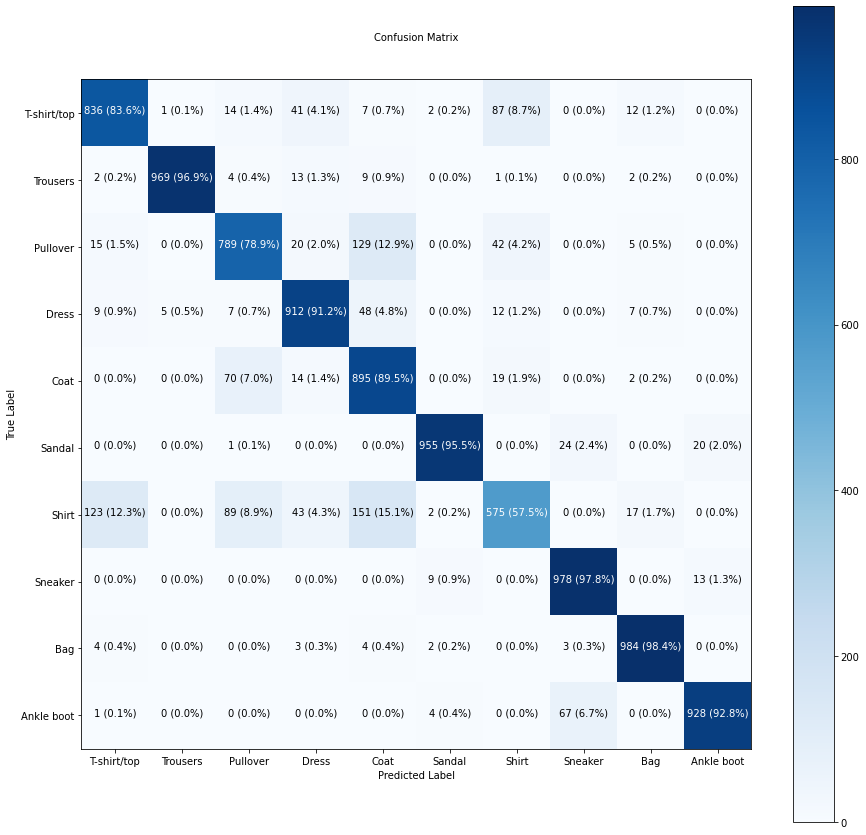

In [ ]:
plot_confusion_matrix(y_true=test_labels,
                      y_preds=preds,
                      classes=class_names,
                      figsize=(15, 15),
                      text_size= 10)

In [ ]:
def plot_random_image(model, images, true_labels, classes):

  i = random.randint(0, len(images))

  target_image = images[i]
  pred_probs = model.predict(tf.reshape(target_image, shape=(1, 28, 28)))
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  plt.imshow(target_image, cmap=plt.cm.binary)

  if pred_label == true_label:
    color = "green"
  else:
    color = "red"
  
  plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                  100*tf.reduce_max(pred_probs),
                                                  true_label),
             color=color,
             fontsize=10)
 

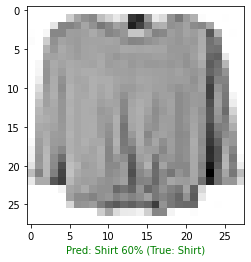

In [ ]:
plot_random_image(model=model_f,
                  images=test_data_norm,
                  true_labels=test_labels,
                  classes=class_names)